In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set()

In [2]:
df=pd.read_csv('C:\\Users\\Admin\\Desktop\\data analyst\\datasets\\WA_Fn-UseC_-Marketing-Customer-Value-Analysis.csv')
df.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [3]:
df.shape

(9134, 24)

In [4]:
#variable encoding
df['Engaged'] = df['Response'].apply(lambda x: 1 if x == 'Yes' else 0)
df['Engaged'].mean()

0.14320122618786948

In [5]:
continuous_features = [
    'Customer Lifetime Value', 'Income', 'Monthly Premium Auto',
    'Months Since Last Claim', 'Months Since Policy Inception',
    'Number of Open Complaints', 'Number of Policies', 'Total Claim Amount'
]

In [6]:
columns_to_encode = [
'Sales Channel', 'Vehicle Size', 'Vehicle Class', 'Policy', 'Policy Type',
'EmploymentStatus', 'Marital Status', 'Education', 'Coverage'
]

In [7]:
m=df[['Sales Channel','Vehicle Size','Vehicle Class','Policy','Policy Type','EmploymentStatus', 'Marital Status', 'Education', 'Coverage']]

In [8]:
categorical_features=[]
for col in columns_to_encode:
    encoded_df=pd.get_dummies(m)
    encoded_df.columns = [col.replace(' ', '.') + '.' + x for x in  encoded_df.columns]
encoded_df
categorical_features += list(encoded_df.columns)
df2 = pd.concat([df, encoded_df], axis=1)
encoded_df2=encoded_df[['Coverage.Sales Channel_Agent','Coverage.Sales Channel_Branch','Coverage.Sales Channel_Call Center','Coverage.Sales Channel_Web']]
encoded_df2['Coverage.Sales Channel_Agent']=encoded_df2['Coverage.Sales Channel_Agent'].map({True:1,False:0})
encoded_df2['Coverage.Sales Channel_Branch']=encoded_df2['Coverage.Sales Channel_Branch'].map({True:1,False:0})
encoded_df2['Coverage.Sales Channel_Call Center']=encoded_df2['Coverage.Sales Channel_Call Center'].map({True:1,False:0})
encoded_df2['Coverage.Sales Channel_Web']=encoded_df2['Coverage.Sales Channel_Web'].map({True:1,False:0})
encoded_df2

C:\Users\Admin\AppData\Local\Temp\ipykernel_30600\1786103026.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  encoded_df2['Coverage.Sales Channel_Agent']=encoded_df2['Coverage.Sales Channel_Agent'].map({True:1,False:0})
C:\Users\Admin\AppData\Local\Temp\ipykernel_30600\1786103026.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  encoded_df2['Coverage.Sales Channel_Branch']=encoded_df2['Coverage.Sales Channel_Branch'].map({True:1,False:0})
C:\Users\Admin\AppData\Local\Temp\ipykernel_30600\1786103026.py

,Coverage.Sales Channel_Agent,Coverage.Sales Channel_Branch,Coverage.Sales Channel_Call Center,Coverage.Sales Channel_Web
0,1,0,0,0
1,1,0,0,0
2,1,0,0,0
3,0,0,1,0
4,1,0,0,0
...,...,...,...,...
9129,0,0,0,1
9130,0,1,0,0
9131,0,1,0,0
9132,0,1,0,0


In [9]:
df=pd.concat([df, encoded_df], axis=1)

In [10]:
df['Is.Female'] = df['Gender'].apply(lambda x: 1 if x == 'F' else 0)
categorical_features.append('Is.Female')

In [11]:
all_features = continuous_features + categorical_features
response = 'Engaged'
sample_df =df[all_features + [response]]
sample_df.columns = [x.replace(' ', '.') for x in sample_df.columns]
all_features = [x.replace(' ', '.') for x in all_features]

In [12]:
sample_df.head()

,Customer.Lifetime.Value,Income,Monthly.Premium.Auto,Months.Since.Last.Claim,Months.Since.Policy.Inception,Number.of.Open.Complaints,Number.of.Policies,Total.Claim.Amount,Coverage.Sales.Channel_Agent,Coverage.Sales.Channel_Branch,...,Coverage.Education_Bachelor,Coverage.Education_College,Coverage.Education_Doctor,Coverage.Education_High.School.or.Below,Coverage.Education_Master,Coverage.Coverage_Basic,Coverage.Coverage_Extended,Coverage.Coverage_Premium,Is.Female,Engaged
0,2763.519279,56274,69,32,5,0,1,384.811147,True,False,...,True,False,False,False,False,True,False,False,1,0
1,6979.535903,0,94,13,42,0,8,1131.464935,True,False,...,True,False,False,False,False,False,True,False,1,0
2,12887.431650,48767,108,18,38,0,2,566.472247,True,False,...,True,False,False,False,False,False,False,True,1,0
3,7645.861827,0,106,18,65,0,7,529.881344,False,False,...,True,False,False,False,False,True,False,False,0,0
4,2813.692575,43836,73,12,44,0,1,138.130879,True,False,...,True,False,False,False,False,True,False,False,0,0


In [13]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(sample_df[all_features],
sample_df[response], test_size=0.3)

In [14]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=200,
max_depth=5
)
rf_model.fit(X=x_train, y=y_train)


RandomForestClassifier(max_depth=5, n_estimators=200)

In [15]:
rf_model.estimators_

[DecisionTreeClassifier(max_depth=5, max_features='sqrt',
                        random_state=1993168483),
 DecisionTreeClassifier(max_depth=5, max_features='sqrt',
                        random_state=1828365902),
 DecisionTreeClassifier(max_depth=5, max_features='sqrt',
                        random_state=1199345922),
 DecisionTreeClassifier(max_depth=5, max_features='sqrt', random_state=896833231),
 DecisionTreeClassifier(max_depth=5, max_features='sqrt', random_state=324125832),
 DecisionTreeClassifier(max_depth=5, max_features='sqrt',
                        random_state=2073337181),
 DecisionTreeClassifier(max_depth=5, max_features='sqrt', random_state=350078115),
 DecisionTreeClassifier(max_depth=5, max_features='sqrt', random_state=972774150),
 DecisionTreeClassifier(max_depth=5, max_features='sqrt', random_state=663111958),
 DecisionTreeClassifier(max_depth=5, max_features='sqrt',
                        random_state=1500797709),
 DecisionTreeClassifier(max_depth=5, max_feat

In [16]:
rf_model.estimators_[0].predict(x_test)

C:\Users\Admin\anaconda3\envs\py3-tf2\lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


array([0., 0., 0., ..., 0., 0., 0.])

In [17]:
rf_model.feature_importances_

array([0.06709845, 0.07715683, 0.061133  , 0.02910703, 0.05781797,
       0.01368356, 0.01783655, 0.08983519, 0.04096137, 0.00845301,
       0.00602445, 0.00421445, 0.00459429, 0.00655204, 0.00796809,
       0.00480436, 0.00080037, 0.00371854, 0.00362323, 0.00456557,
       0.00242774, 0.00058081, 0.00122606, 0.00114746, 0.00125807,
       0.00093538, 0.00107219, 0.00034344, 0.00060715, 0.00536965,
       0.00140151, 0.00120926, 0.00164472, 0.00471199, 0.03171926,
       0.00728992, 0.28296453, 0.03398251, 0.03541471, 0.0135054 ,
       0.01485067, 0.00502364, 0.00758126, 0.00576185, 0.00440626,
       0.00706826, 0.00357171, 0.00511872, 0.00255731, 0.0053002 ])

In [18]:
feature_importance_df = pd.DataFrame(list(zip(rf_model.feature_importances_,
all_features)))
feature_importance_df.columns = ['feature.importance', 'feature']

In [19]:
feature_importance_df

,feature.importance,feature
0,0.067098,Customer.Lifetime.Value
1,0.077157,Income
2,0.061133,Monthly.Premium.Auto
3,0.029107,Months.Since.Last.Claim
4,0.057818,Months.Since.Policy.Inception
5,0.013684,Number.of.Open.Complaints
6,0.017837,Number.of.Policies
7,0.089835,Total.Claim.Amount
8,0.040961,Coverage.Sales.Channel_Agent
9,0.008453,Coverage.Sales.Channel_Branch


In [20]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

In [21]:
in_sample_preds = rf_model.predict(x_train)
out_sample_preds = rf_model.predict(x_test)

In [22]:
# accuracy
print(accuracy_score(y_train, in_sample_preds))
print(accuracy_score(y_test,out_sample_preds))
# precision

print(precision_score(y_train, in_sample_preds))
print(precision_score(y_test,out_sample_preds))
# recall

print(recall_score(y_train, in_sample_preds))
print(recall_score(y_test,out_sample_preds))

0.8740810261223213
0.8723093761400948
0.9911504424778761
0.9565217391304348
0.1222707423580786
0.11224489795918367


In [23]:
from sklearn.metrics import roc_curve, auc

In [24]:
in_sample_preds = rf_model.predict_proba(x_train)[:,1]
out_sample_preds = rf_model.predict_proba(x_test)[:,1]

In [25]:
in_sample_fpr, in_sample_tpr, in_sample_thresholds = roc_curve(y_train,
in_sample_preds)
out_sample_fpr, out_sample_tpr, out_sample_thresholds = roc_curve(y_test,
out_sample_preds)

In [26]:
in_sample_roc_auc = auc(in_sample_fpr, in_sample_tpr)
out_sample_roc_auc = auc(out_sample_fpr, out_sample_tpr)
print('In-Sample AUC: %0.4f' % in_sample_roc_auc)
print('Out-Sample AUC: %0.4f' % out_sample_roc_auc)

In-Sample AUC: 0.8784
Out-Sample AUC: 0.8274


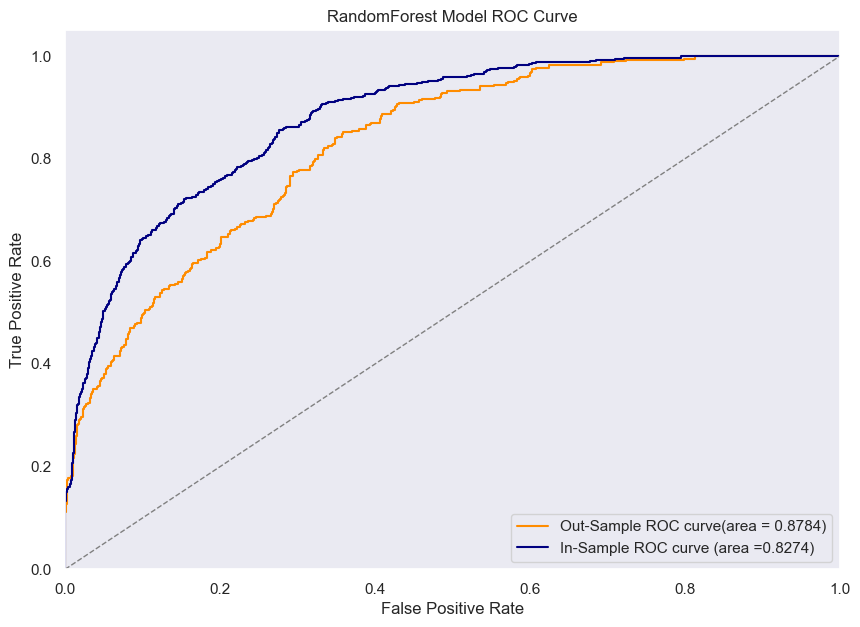

In [27]:
plt.figure(figsize=(10,7))
plt.plot(
out_sample_fpr, out_sample_tpr, color='darkorange', label='Out-Sample ROC curve(area = %0.4f)' % in_sample_roc_auc
)
plt.plot(
in_sample_fpr, in_sample_tpr, color='navy', label='In-Sample ROC curve (area =%0.4f)' % out_sample_roc_auc
)
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
plt.grid()
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('RandomForest Model ROC Curve')
plt.legend(loc="lower right")
plt.show()